In [1]:
#Jakub Maksymczuk, Jakub Owieśny, Maciej Majewski, Jędrzej Alicki, Ihar Uzun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
from sklearn.linear_model import LinearRegression
from statistics import mean
from sklearn.metrics import mean_squared_error

plt.rcParams["figure.figsize"] = (25,20)
plt.rcParams.update({'font.size': 26})

In [2]:
df = pd.read_csv('goldset.csv')
df.fillna(method='ffill', inplace=True)
df.head()


,x
0,306.25
1,299.50
2,303.45
3,296.75
4,304.40


[769]
Outlier at:          x
769  593.7


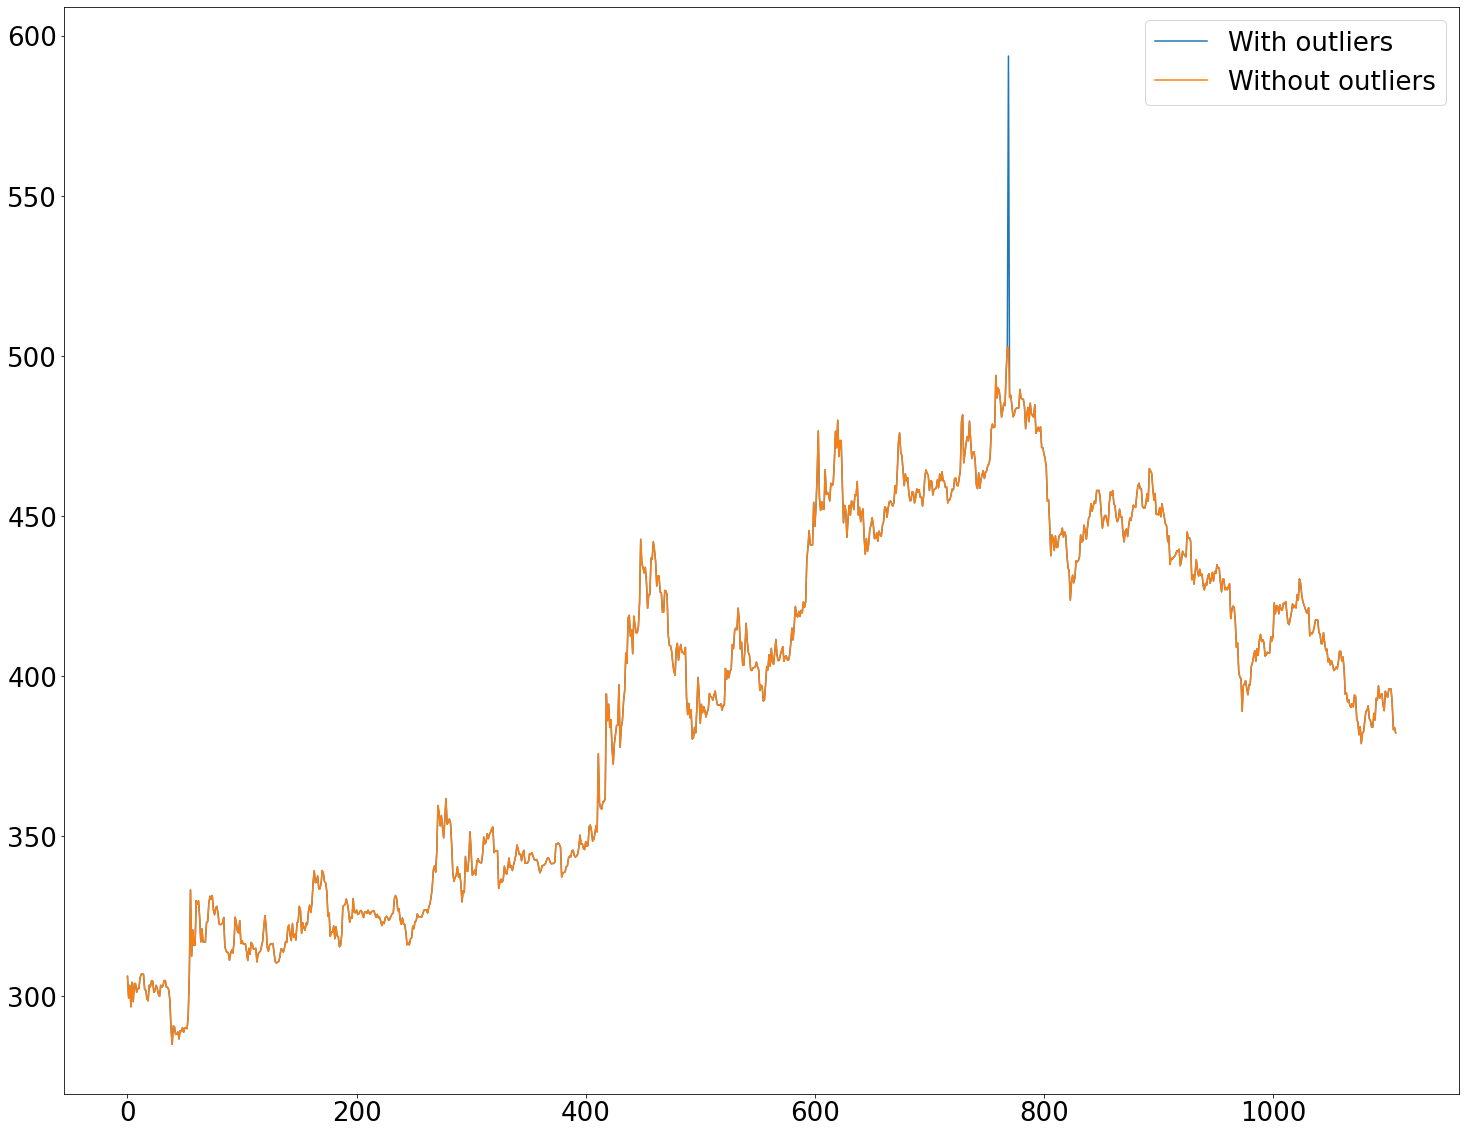

In [3]:
z = np.abs(stats.zscore(df['x']))
outl = np.where(z > 3)[0]
print(outl)
print("Outlier at:", df.loc[outl, :])
plt.plot(df)#with outlier
df['x'][outl]=df['x'][outl-1]
plt.plot(df)#without outlier
plt.legend(['With outliers', 'Without outliers'])
plt.show()

In [4]:
date1 = '1985-01-01'
date2 = '1989-03-31'

dates = np.array(date1, dtype=np.datetime64) + np.arange(1108)
data = []

for row in df['x']:
    data.append(row)
    
newdf = pd.DataFrame({'x' : data}, index=dates)
newdf.head()

,x
1985-01-01,306.25
1985-01-02,299.50
1985-01-03,303.45
1985-01-04,296.75
1985-01-05,304.40


In [5]:
part1=newdf[:600]
part2=newdf[600:]

print("part1 mean", part1.mean())
print("part2 mean", part2.mean())

print("part1 var", part1.var())
print("part2 var", part2.var())
#The changes in the variance differ a lot, thus our dataset is not stationary.

part1 mean x    351.75325
dtype: float64
part2 mean x    440.846752
dtype: float64
part1 var x    1610.863182
dtype: float64
part2 var x    738.650754
dtype: float64


In [6]:
logdf=np.log(1+newdf.x)
ogdf=logdf
logdf=logdf.diff()
df=logdf

In [7]:
part1=df[1:600]
part2=df[600:]

print("part1 mean", mean(part1))
print("part2 mean", mean(part2))

print("part1 var", np.var(part1))
print("part2 var", np.var(part2))

part1 mean 0.0006565856325452285
part2 mean -0.0003388554526658017
part1 var 0.00015685631094611326
part2 var 8.26292592539477e-05


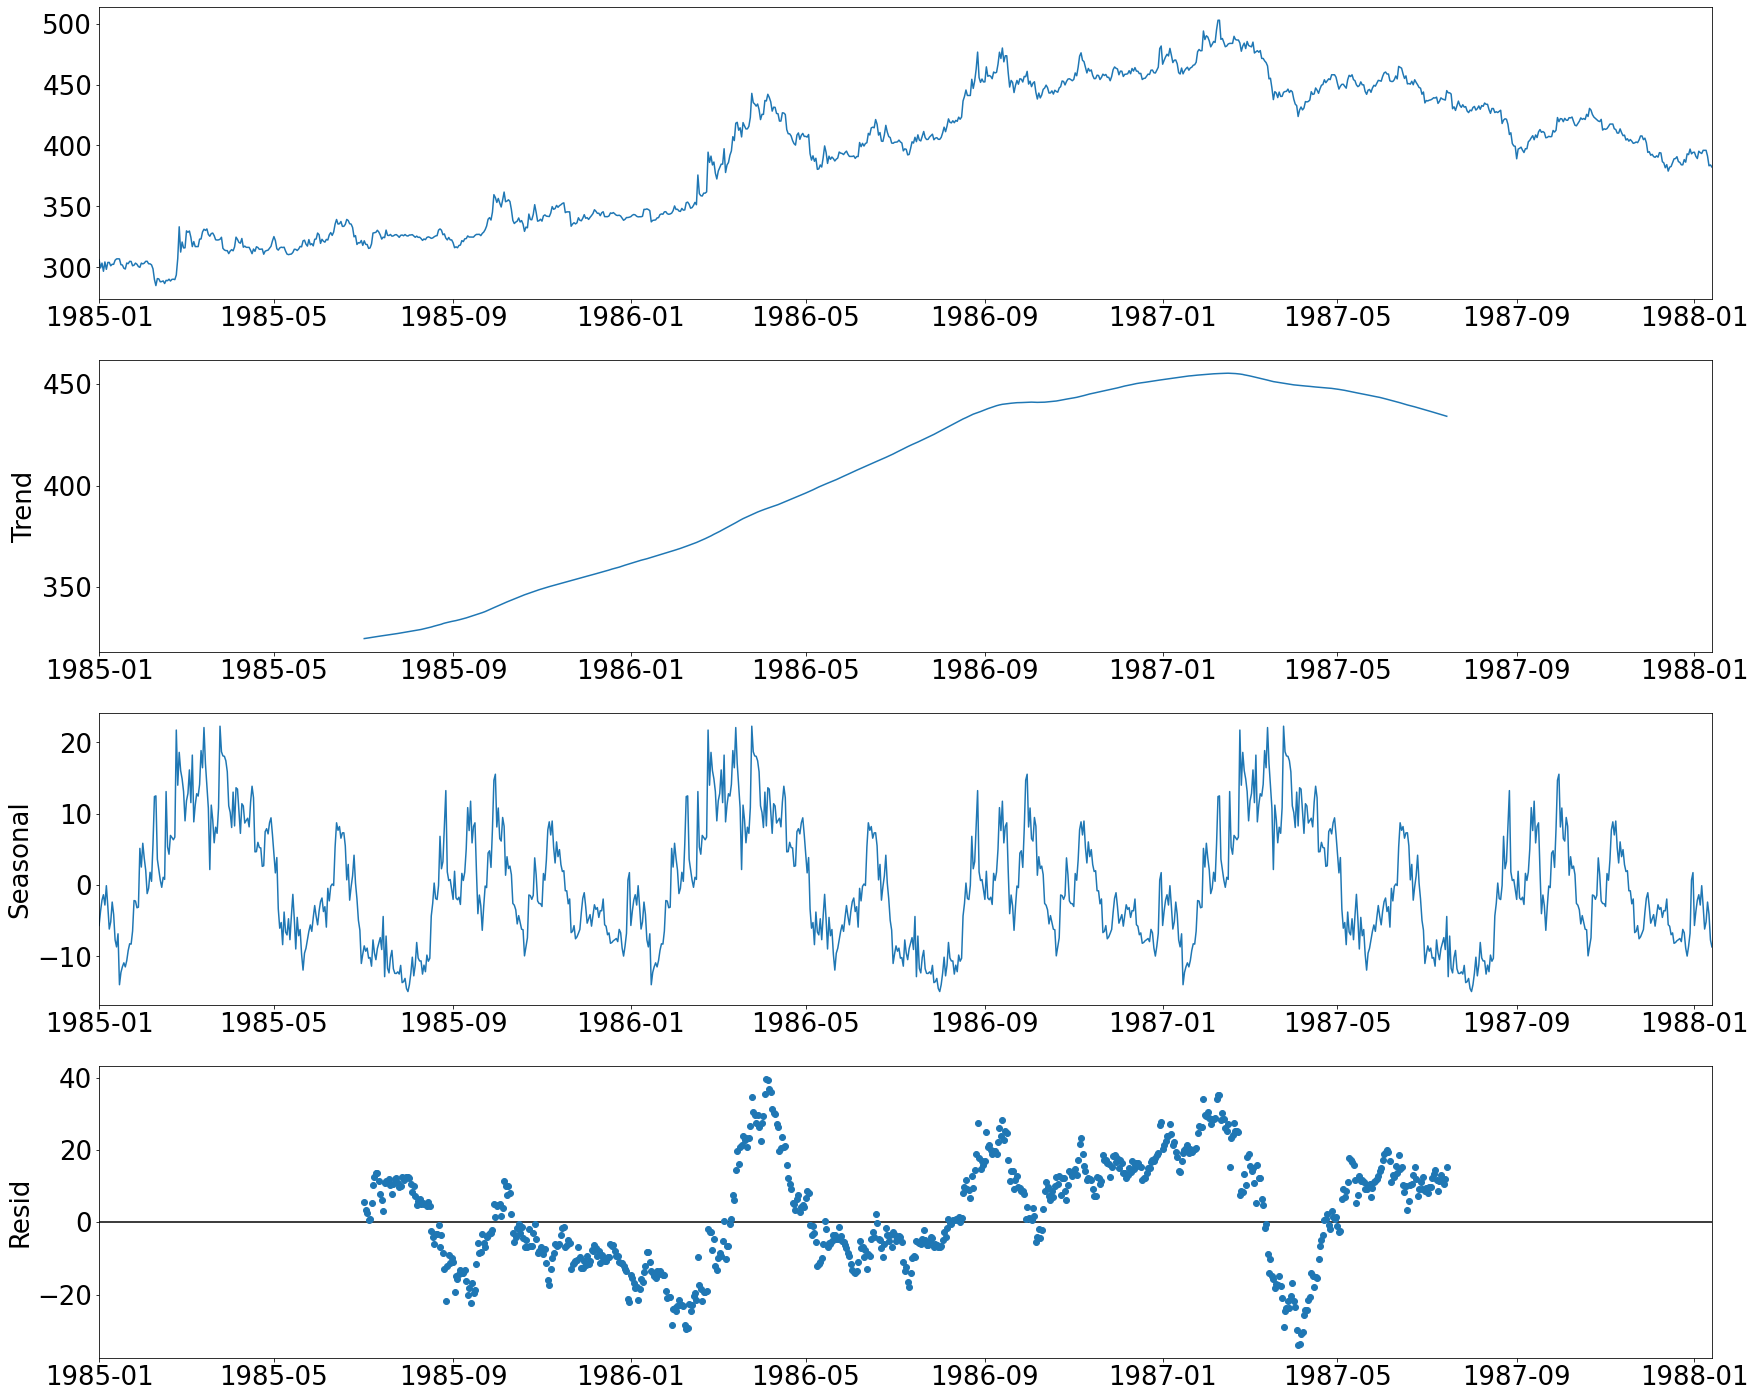

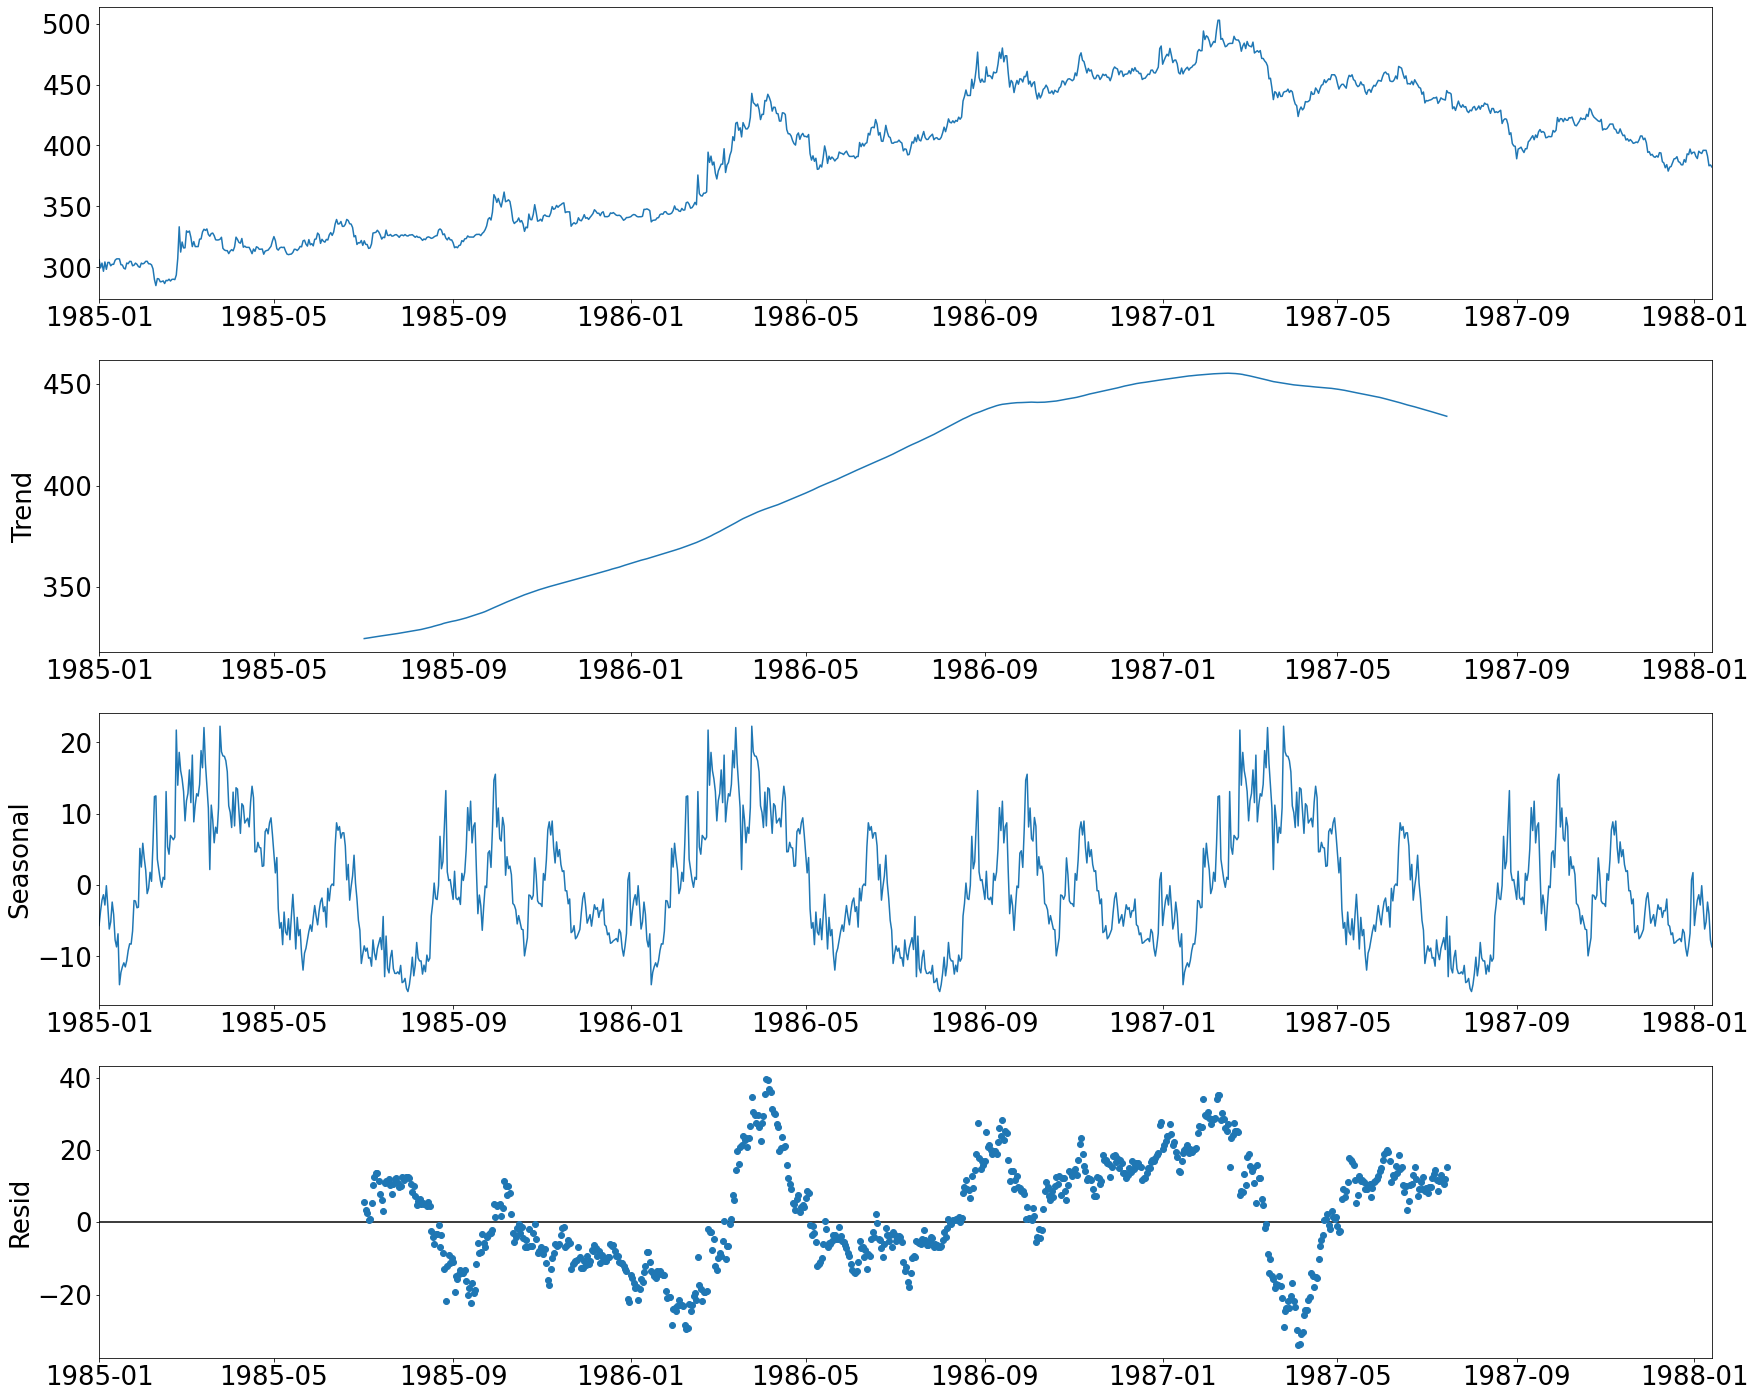

In [8]:
seasonal_decompose(newdf, model='additive', period=365).plot()

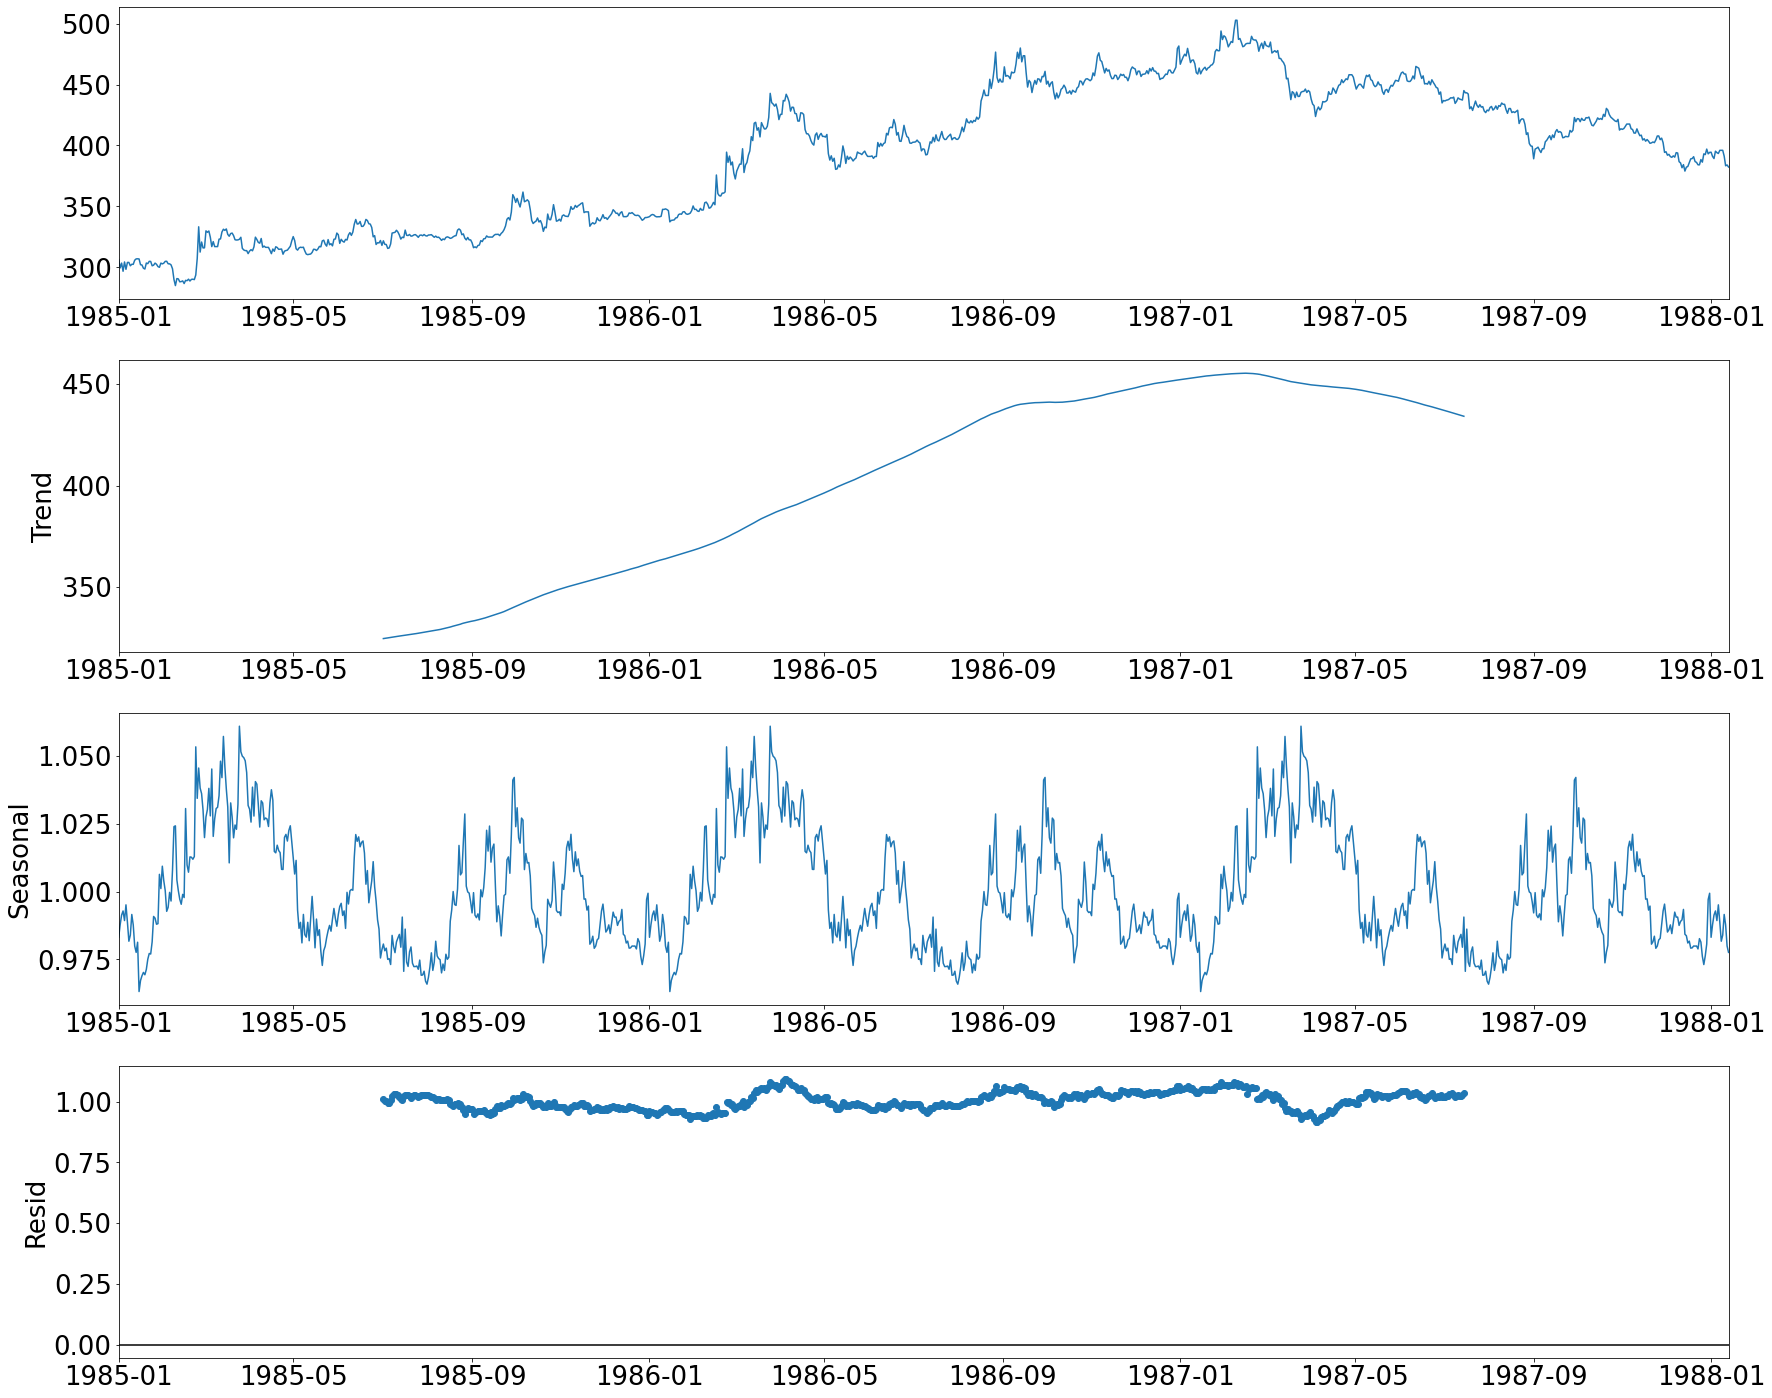

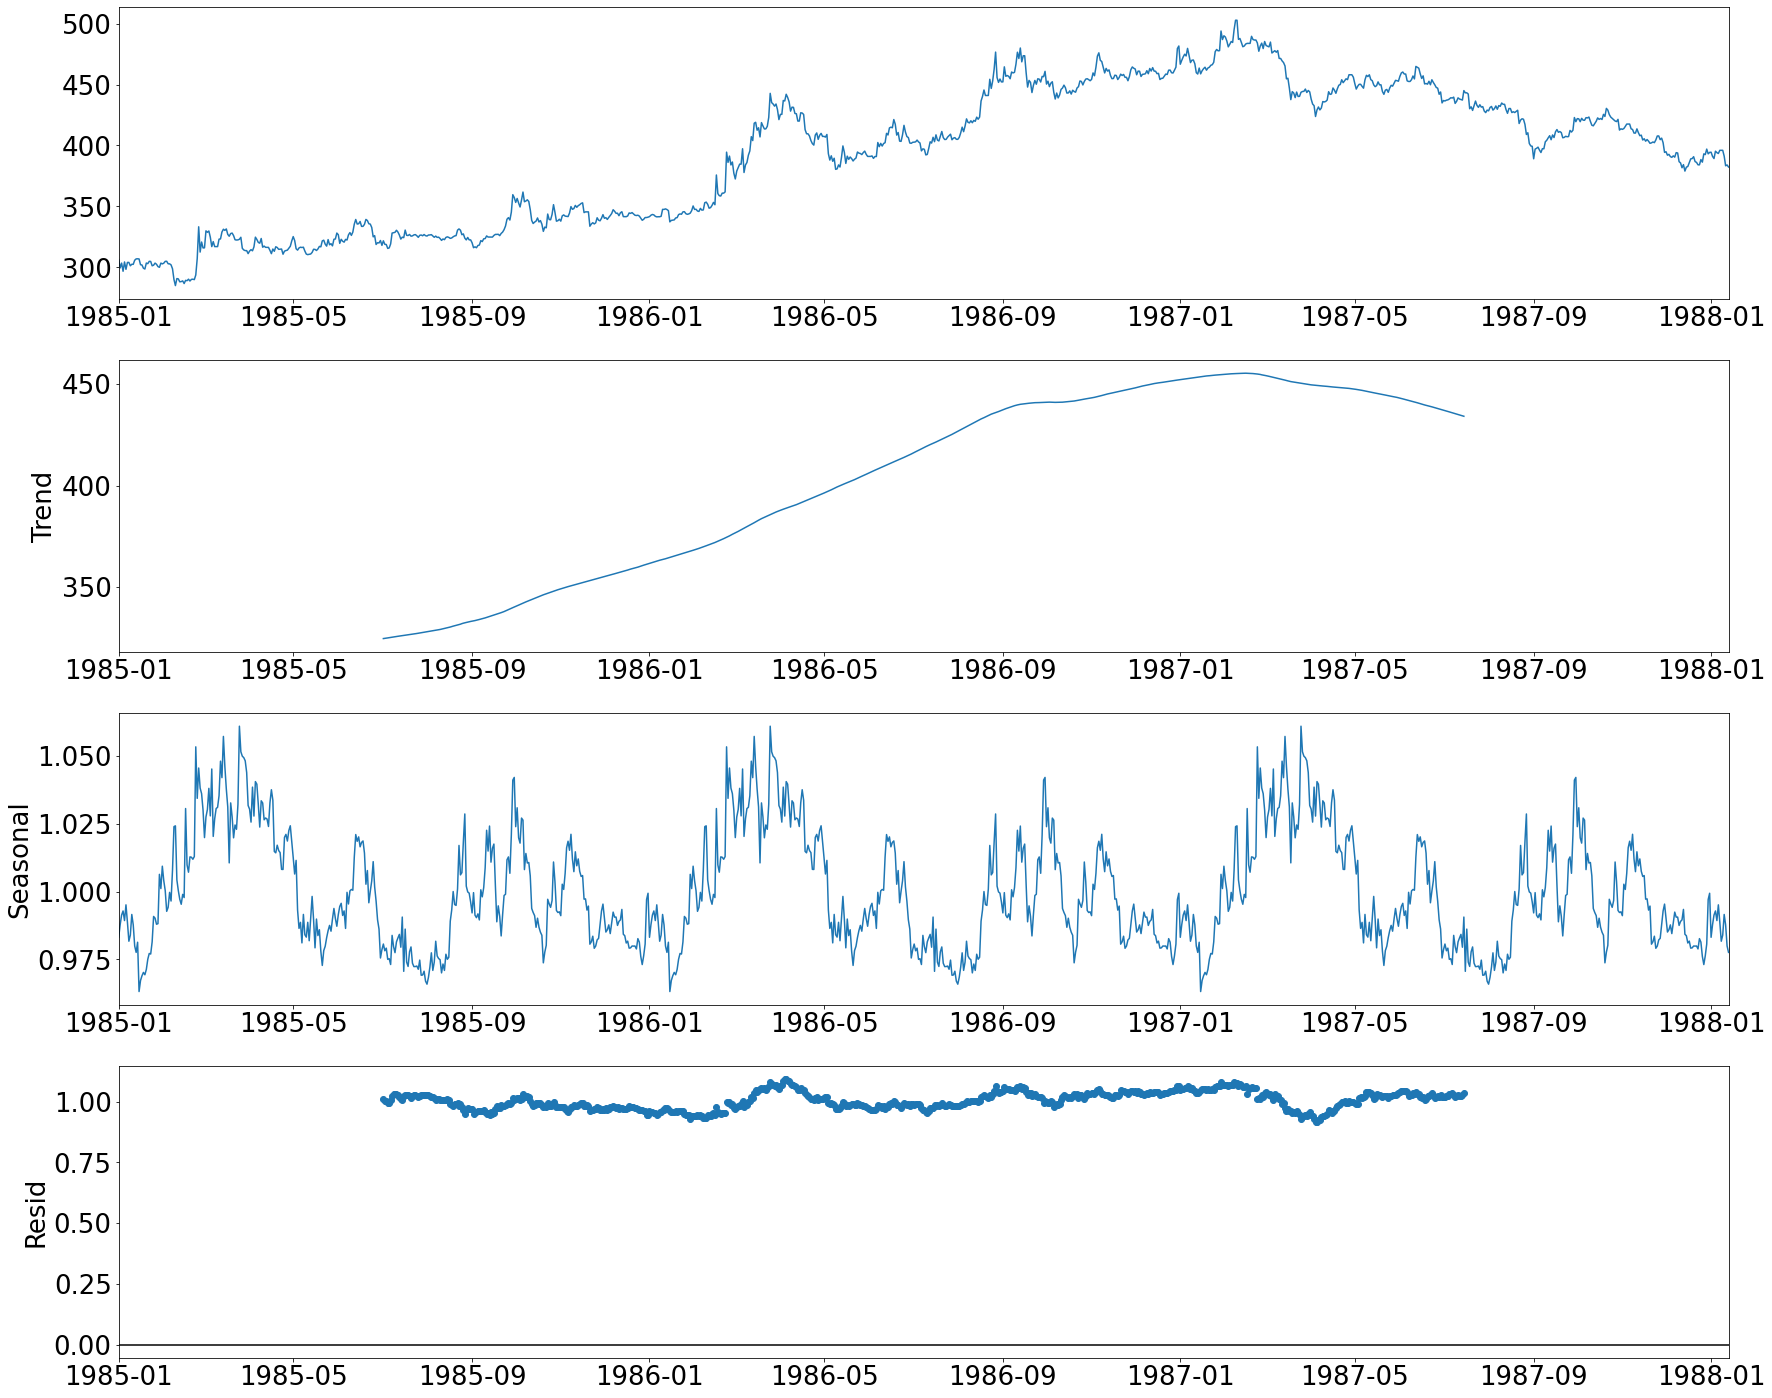

In [9]:
seasonal_decompose(newdf, model='multiplicative', period=365).plot()

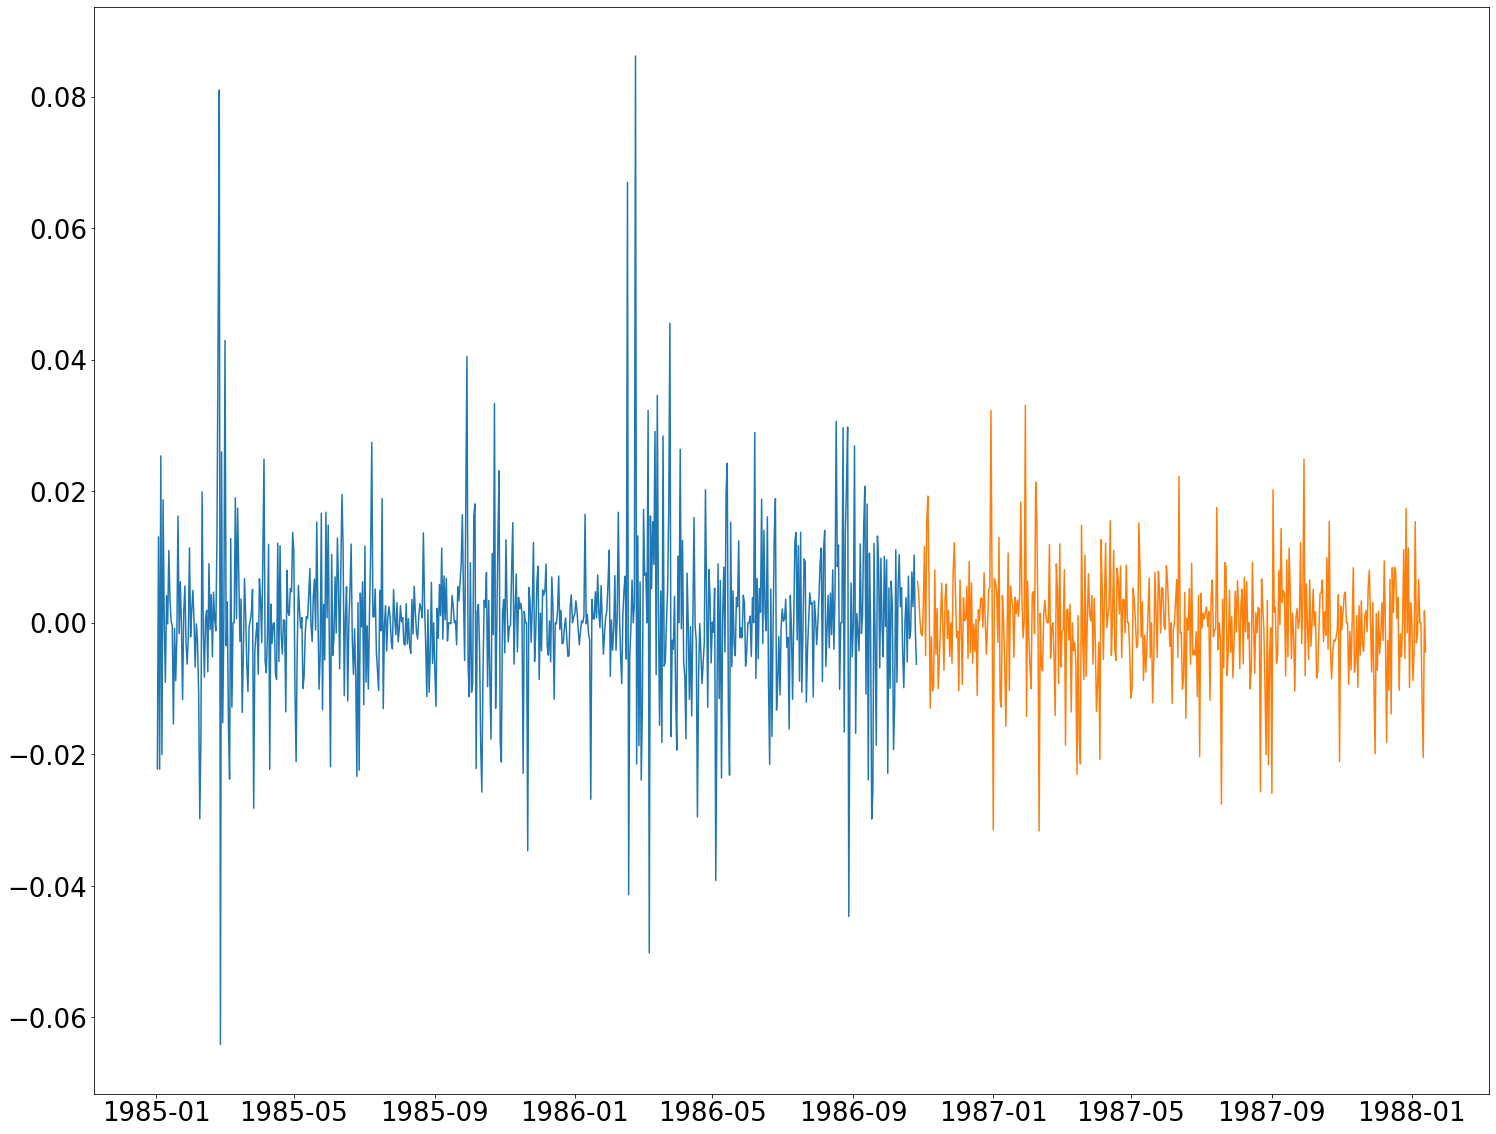

In [10]:
#division into training and testing sets
X=df.values
size=int(len(X) * 0.6)
train=X[:size]
test=X[size:]
real=[x for x in train]
pred=list()
plt.plot(df[:size])
plt.plot(df[size:])
plt.show()

ARIMA MODEL

In [11]:
import warnings
warnings.filterwarnings("ignore")

#training ARIMA model
for i in range(len(test)):
    model=ARIMA(real, order=(5,1,0))
    model_fit=model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    pred.append(yhat)
    obs=test[i]
    real.append(obs)

In [12]:
rmse=math.sqrt(mean_squared_error(test, pred))
#root mean squared error
print('Test RMSE: ', rmse)
#inverse differentiation
train=np.hstack((ogdf[0], train)).cumsum()
test=np.hstack((ogdf[size], test)).cumsum()
pred=np.hstack((ogdf[size], pred)).cumsum()

Test RMSE:  0.009003169872325646


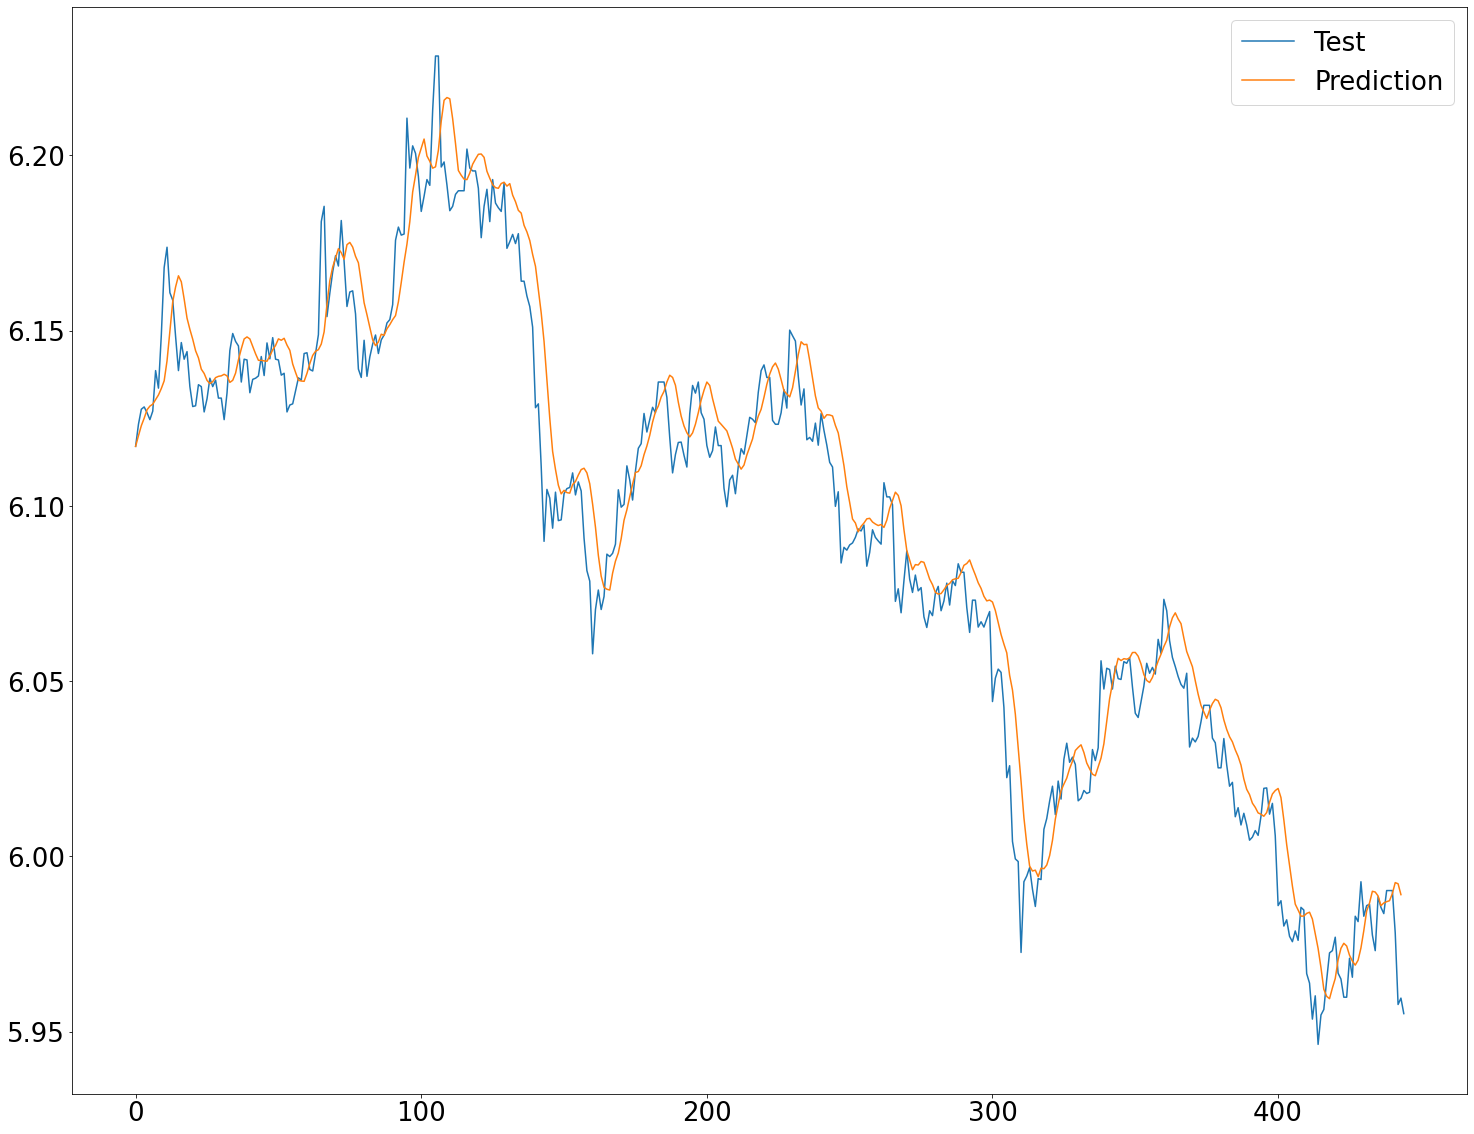

In [18]:
plt.plot(test)
plt.plot(pred)
plt.legend(['Test', 'Prediction'])
plt.show()

In [14]:

dates=ogdf.index[size:]
pred=pred[:len(pred)-1]


In [15]:
lastdf=pd.DataFrame({'x': pred}, index=dates)

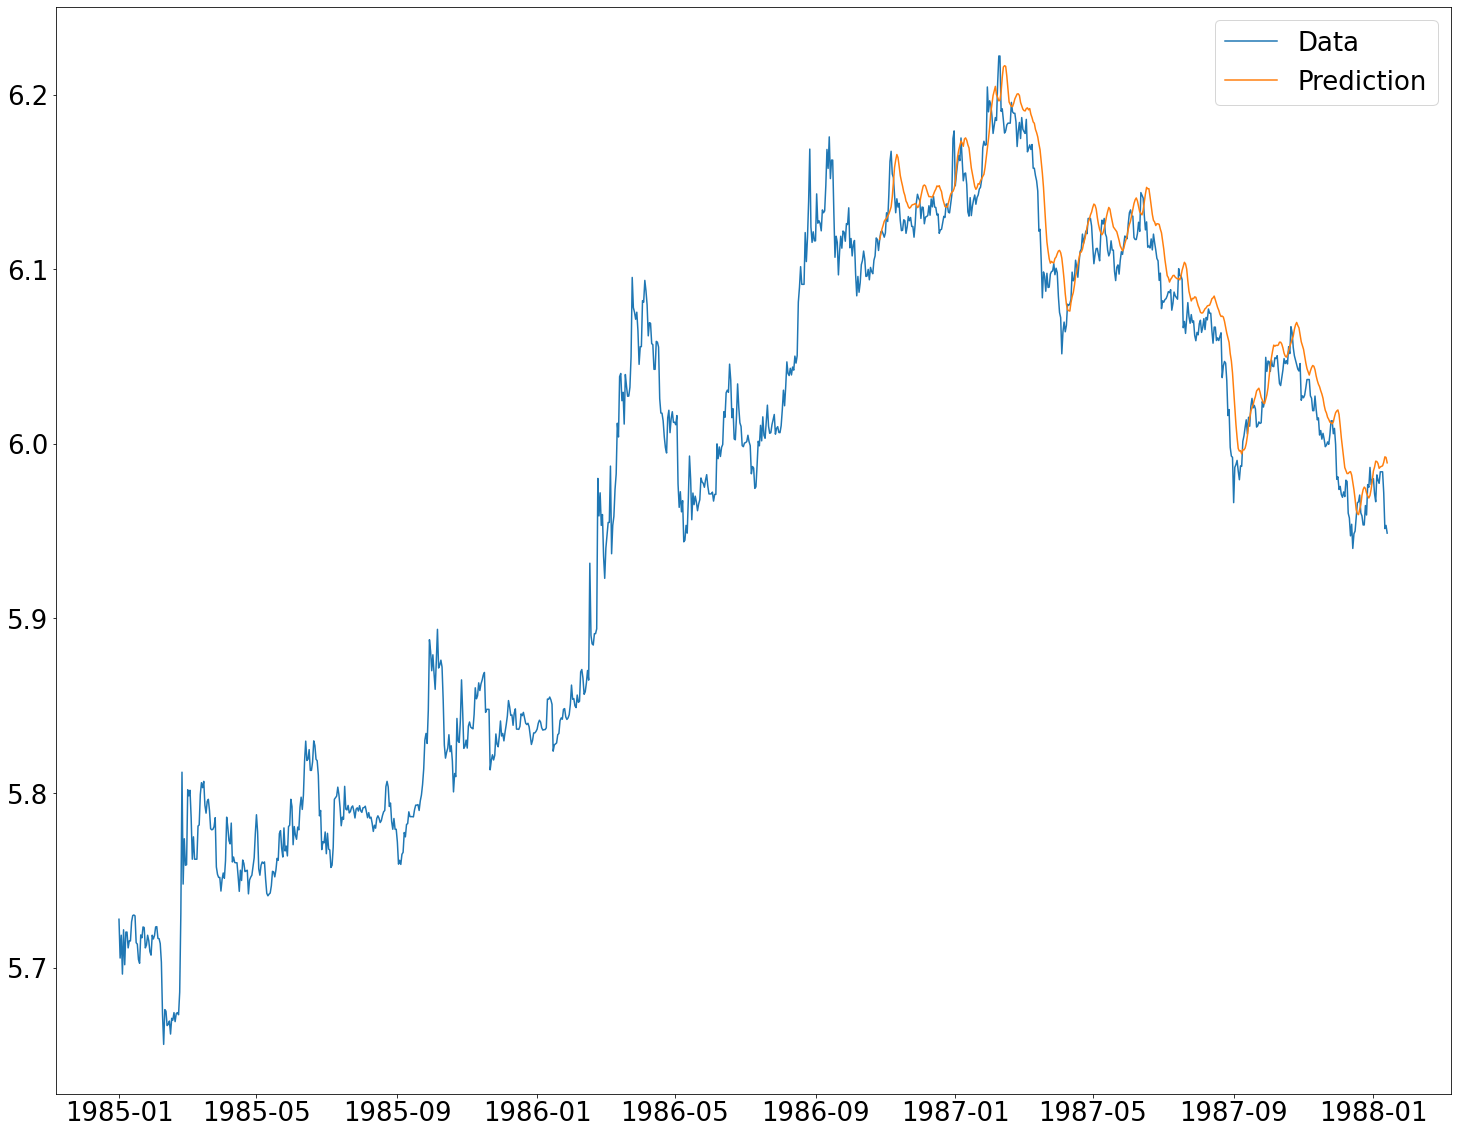

In [16]:
plt.plot(ogdf)
plt.plot(lastdf)
plt.legend(['Data', 'Prediction'])
plt.show()